<a href="https://colab.research.google.com/github/gustavo1902/RedesNeurais/blob/main/Projeto_Final_Resolvendo_um_problema_pr%C3%A1tico_com_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 5**

Equipe:


*   Caio Eduardo Marcondes
*   Gustavo Morais Costa

**Introdução**

>Nessa atividade ...



# 1 - Base de dados

**Conjunto de dados (nome):** https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download

Importando Bibliotecas

In [64]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import scikitplot as skplt
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

Importando a Base de Dados

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregando a Base de Dados

In [66]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ia/archive/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ia/archive/train.csv")

#data_set = pd.read_csv("/content/test.csv")
#data_set = pd.read_csv("/content/train.csv")

#data_set.drop_duplicates(inplace=True)#remove dados duplicados

# 2 - Verificando o relacionamento entre os dados

Base de dados para treino

In [ ]:
# Exibe as 5 primeiras linhas do dataset
print(train.shape)
train.head(10)

(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [58]:
# removendo colunas desnecessárias
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
# exibindo informações sobre as colunas restantes do dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Base de dados para teste

In [59]:
#exibindo as dez primeiras linhas
print(test.shape)
test.head(10)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [68]:
#substituindo os espaços nas colunas por sublinhados
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

In [69]:
#substituindo strings por binário
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

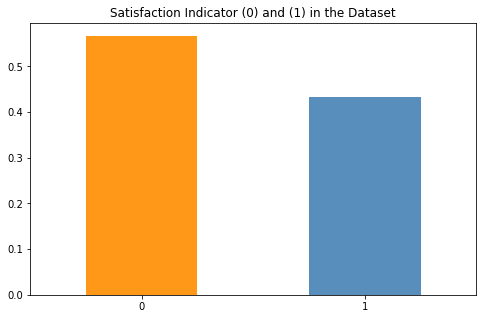

In [ ]:
#está balanceado?
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [ ]:
#Verificando a quantidade de valores ausentes (NaN) em cada coluna do conjunto de dados "train" e armazenando-os em duas séries "total" e "percent", respectivamente. 
#Em seguida, essas duas séries são concatenadas em um DataFrame "missing" e os cinco primeiros valores são exibidos.
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


In [ ]:
# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [ ]:
#Identifica colunas com tipo de dados "object" no DataFrame "train".
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [70]:
#Esse código preenche as colunas vazias dos datasets "train" e "test" 
#com o valor mais frequente presente nas colunas correspondentes.

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

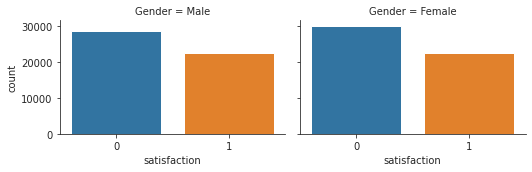

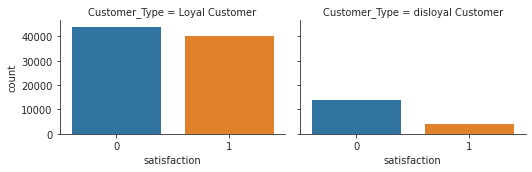

In [ ]:
#Gerando de barras agrupados por gênero e tipo de cliente para satisfação
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)

# 3 - Definindo os conjuntos de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Dividindo os dados em conjunto de treinamento e teste
X = train.drop(['satisfaction'], axis=1)
y = train['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificando as variáveis categóricas
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_train['Customer_Type'] = le.fit_transform(X_train['Customer_Type'])
X_train['Type_of_Travel'] = le.fit_transform(X_train['Type_of_Travel'])
X_train['Class'] = le.fit_transform(X_train['Class'])

X_test['Gender'] = le.fit_transform(X_test['Gender'])
X_test['Customer_Type'] = le.fit_transform(X_test['Customer_Type'])
X_test['Type_of_Travel'] = le.fit_transform(X_test['Type_of_Travel'])
X_test['Class'] = le.fit_transform(X_test['Class'])

# 4 - Implementação da RNA, variações e avaliações

In [26]:
# Treinando a RNA
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

# Realizando previsões e avaliando a precisão
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9384052740484096


              precision    recall  f1-score   support

           0       0.93      0.96      0.95     47166
           1       0.95      0.91      0.93     35957

    accuracy                           0.94     83123
   macro avg       0.94      0.94      0.94     83123
weighted avg       0.94      0.94      0.94     83123



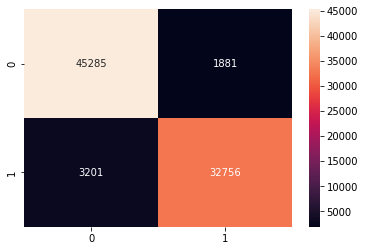

In [28]:
#adaptar

#--------------------------------------------------
# Uma vez que as previsões são geradas, podemos avaliar o desempenho do modelo. 
#--------------------------------------------------
#Aslinhas de código abaixo imprimem a matriz de confusão e os 
#resultados do relatório de confusão nos dados de treinamento.
#--------------------------------------------------
#Desempenho conjunto de treinamento
cm = confusion_matrix(y_train,predict_train)
sns.heatmap(cm,annot=True,fmt="d") 
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11713
           1       0.95      0.91      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



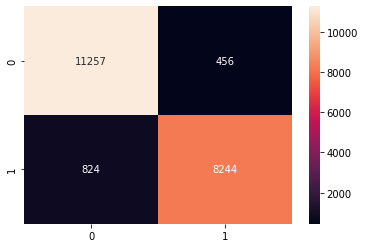

In [29]:
#adaptar

#--------------------------------------------------
#As linhas de código abaixo imprimem a matriz de confusão e os 
#resultados do relatório de confusão nos dados de treinamento.
#--------------------------------------------------
#Desempenho conjunto de Teste
cm = confusion_matrix(y_test,predict_test)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,predict_test))

Curva de aprendizado

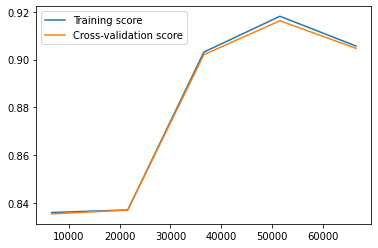

In [25]:
# Cria o objeto do modelo
mlp = MLPClassifier()

# Define os valores para o parâmetro de treinamento (tamanho do conjunto de treinamento)
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=5)

# Gráfico
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")
plt.legend()
plt.show()

Relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos

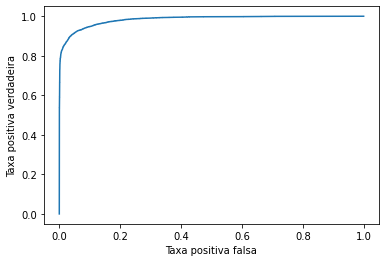

In [27]:
# Obtém as previsões e a probabilidade de cada classe
mlp.fit(X_train, y_train)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]

# Obtém as métricas da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Gráfico
plt.plot(fpr, tpr)
plt.xlabel("Taxa positiva falsa")
plt.ylabel("Taxa positiva verdadeira")
plt.show()

In [41]:
# Variando a RNA ex.1
# Cria o objeto do modelo
mlp1 = MLPClassifier(hidden_layer_sizes=(50,50,20,20,10), activation='tanh', solver='adam', max_iter=1000)
mlp1.fit(X_train, y_train)

# Realizando previsões e avaliando a precisão
predict1_train = mlp1.predict(X_train)
predict1_test = mlp1.predict(X_test)
y_pred1 = mlp1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy: ", accuracy1)

Accuracy:  0.9315239882585054


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     47166
           1       0.96      0.88      0.92     35957

    accuracy                           0.93     83123
   macro avg       0.94      0.93      0.93     83123
weighted avg       0.93      0.93      0.93     83123



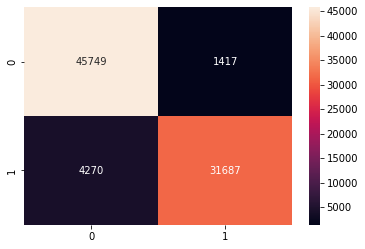

In [43]:
#adaptar

#--------------------------------------------------
# Uma vez que as previsões são geradas, podemos avaliar o desempenho do modelo. 
#--------------------------------------------------
#Aslinhas de código abaixo imprimem a matriz de confusão e os 
#resultados do relatório de confusão nos dados de treinamento.
#--------------------------------------------------
#Desempenho conjunto de treinamento
cm = confusion_matrix(y_train,predict1_train)
sns.heatmap(cm,annot=True,fmt="d") 
print(classification_report(y_train,predict1_train))

In [42]:
#Variando a RNA ex.2
# Cria o objeto do modelo
mlp2 = MLPClassifier()

mlp2 = MLPClassifier(hidden_layer_sizes=(20), activation='relu', solver='adam', max_iter=1000)
mlp2.fit(X_train, y_train)

# Realizando previsões e avaliando a precisão
predict2_train = mlp2.predict(X_train)
predict2_test = mlp2.predict(X_test)
y_pred2 = mlp2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy: ", accuracy2)

Accuracy:  0.9274818343679323


              precision    recall  f1-score   support

           0       0.94      0.93      0.93     47166
           1       0.91      0.92      0.91     35957

    accuracy                           0.93     83123
   macro avg       0.92      0.92      0.92     83123
weighted avg       0.93      0.93      0.93     83123



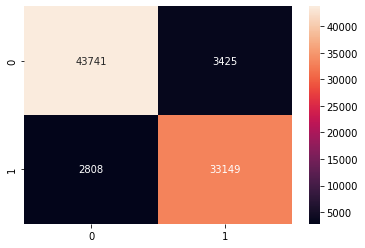

In [44]:
#adaptar

#--------------------------------------------------
# Uma vez que as previsões são geradas, podemos avaliar o desempenho do modelo. 
#--------------------------------------------------
#Aslinhas de código abaixo imprimem a matriz de confusão e os 
#resultados do relatório de confusão nos dados de treinamento.
#--------------------------------------------------
#Desempenho conjunto de treinamento
cm = confusion_matrix(y_train,predict2_train)
sns.heatmap(cm,annot=True,fmt="d") 
print(classification_report(y_train,predict2_train))

# 5 - Avaliando o impacto das mudanças realizadas nos parâmetros, na etapa anterior, no desempenho da RNA no problema escolhido.

In [45]:
# avaliar o desempenho do modelo nos conjuntos de treinamento e teste
train_loss, test_loss = model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)
print("Treinamento: ", train_loss, "Teste: ", test_loss)

# plotar a evolução da perda durante o treinamento
plt.plot(history.history['loss'], label='Perda - Treinamento')
plt.plot(history.history['val_loss'], label='Perda - Validação')
plt.legend()
plt.show()

NameError: ignored

Alguns pontos importantes para a implementação do projeto de final da disciplina de Redes Neurais Artificiais:
<p>0) Explicar o problema e o significado de cada variável, bem como à sua importância para o problema;
<p>1) Deixar o conjunto de teste separado desde o início das análises (recomendo separar o arquivo original em 2: um para treino e outro para teste); (Feito)
<p>2) Comentar o desempenho dos modelos individuais e explicar a razão dos melhores modelos terem se destacado em relação aos demais;
<p>3) Fazer o ensemble dos modelos e verificar o comportamento do modelo combinado;
<p>4) Fazer uma tabela explicando como os parâmetros foram alterados para gerar os diversos modelos e configurações de RNAs;
Att,

**Conclusão**

>Após ...

**Referências**

>ABNT ...